In [ ]:
import matplotlib.pyplot as plt from sklearn
import datasets, metrics from sklearn.model_selection
import train_test_split digits = datasets.load_digits() plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/

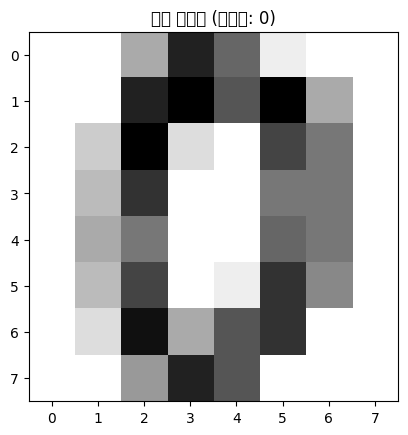

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Test Accuracy ===
Decision Tree : 0.8417
Logistic Reg. : 0.9750
Random Forest : 0.9694


/tmp/ipython-input-3324522228.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette="coolwarm")


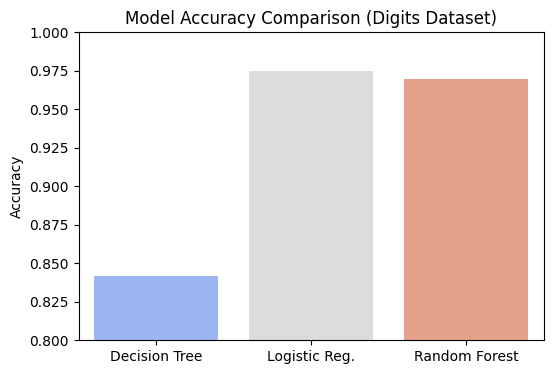

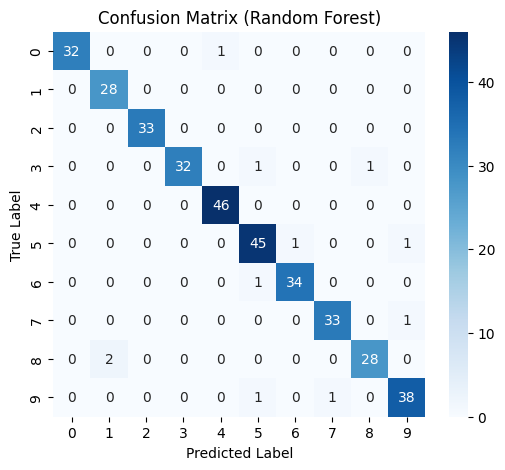

=== Classification Report (Random Forest) ===
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.93      0.95        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [1]:
# -----------------------------
# 1) 라이브러리 임포트
# -----------------------------
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# -----------------------------
# 2) 데이터 로드
# -----------------------------
digits = datasets.load_digits()

# 이미지 확인 (첫 번째 손글씨)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"예시 이미지 (실제값: {digits.target[0]})")
plt.show()

# -----------------------------
# 3) 데이터 분할
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)

# -----------------------------
# 4) 모델 정의
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='auto')
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# -----------------------------
# 5) 모델 학습
# -----------------------------
dt.fit(X_train, y_train)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# -----------------------------
# 6) 예측 및 정확도 평가
# -----------------------------
dt_acc = metrics.accuracy_score(y_test, dt.predict(X_test))
lr_acc = metrics.accuracy_score(y_test, lr.predict(X_test))
rf_acc = metrics.accuracy_score(y_test, rf.predict(X_test))

print("=== Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print(f"Logistic Reg. : {lr_acc:.4f}")
print(f"Random Forest : {rf_acc:.4f}")

# -----------------------------
# 7) 시각화 (정확도 비교)
# -----------------------------
models = ["Decision Tree", "Logistic Reg.", "Random Forest"]
scores = [dt_acc, lr_acc, rf_acc]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=scores, palette="coolwarm")
plt.title("Model Accuracy Comparison (Digits Dataset)")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.show()

# -----------------------------
# 8) Confusion Matrix (RF 기준)
# -----------------------------
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -----------------------------
# 9) 분류 리포트
# -----------------------------
print("=== Classification Report (Random Forest) ===")
print(classification_report(y_test, y_pred))
